**<h2 style="text-align: center; color:#FF0000;">EDA & CLUSTERING EQUIPENHANCE BEHAVIOR</h2>**

#### **Neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

### **Read & explore data**

In [2]:
df_equip=pd.read_csv("../EDA_transform/data/equipenhance_transform.csv")
df_equip

,vopenid,last_update_time,num_enhance,enhance_success_rate,max_enhance_level
0,2206111808105074,2025-06-15 14:53:06+00:00,2,1.00,2
1,2206111830413361,2025-06-16 06:01:59+00:00,79,0.65,7
2,2206112142566650,2025-06-17 03:34:01+00:00,14,0.79,2
3,2206131428405180,2025-06-13 03:56:37+00:00,1,1.00,1
4,2206141543270674,2025-06-10 14:35:30+00:00,2,0.00,0
...,...,...,...,...,...
55133,6220001341173,2025-06-08 06:12:13+00:00,4,0.75,2
55134,6220001406323,2025-06-17 14:14:40+00:00,5,0.40,1
55135,6220001449993,2025-06-13 07:30:53+00:00,4,0.75,2
55136,chungminhde,2025-06-18 11:14:52+00:00,16,0.69,5


In [3]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55138 entries, 0 to 55137
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vopenid               55138 non-null  object 
 1   last_update_time      55138 non-null  object 
 2   num_enhance           55138 non-null  int64  
 3   enhance_success_rate  55138 non-null  float64
 4   max_enhance_level     55138 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [4]:
df_equip.describe()

,num_enhance,enhance_success_rate,max_enhance_level
count,55138.00,55138.00,55138.00
mean,123.71,0.72,4.11
std,246.97,0.20,2.24
min,1.00,0.00,-1.00
25%,8.00,0.61,2.00
50%,32.00,0.71,4.00
75%,138.00,0.85,6.00
max,12899.00,1.00,16.00


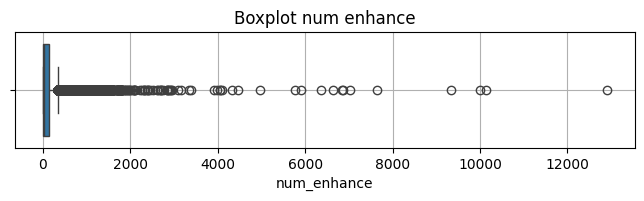

In [5]:
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df_equip['num_enhance'].dropna())
plt.title('Boxplot num enhance')
plt.grid(True)
plt.show()

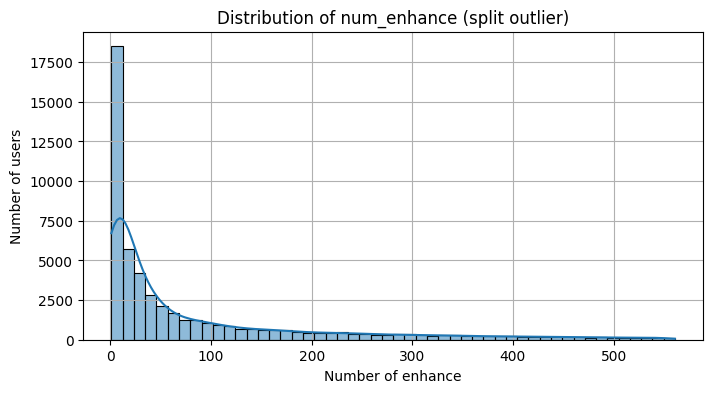

In [6]:
threshold = df_equip['num_enhance'].quantile(0.95)
filtered = df_equip[df_equip['num_enhance'] <= threshold]

plt.figure(figsize=(8,4))
sns.histplot(filtered['num_enhance'], bins=50, kde=True)
plt.title('Distribution of num_enhance (split outlier)')
plt.xlabel('Number of enhance')
plt.ylabel('Number of users')
plt.grid(True)
plt.show()

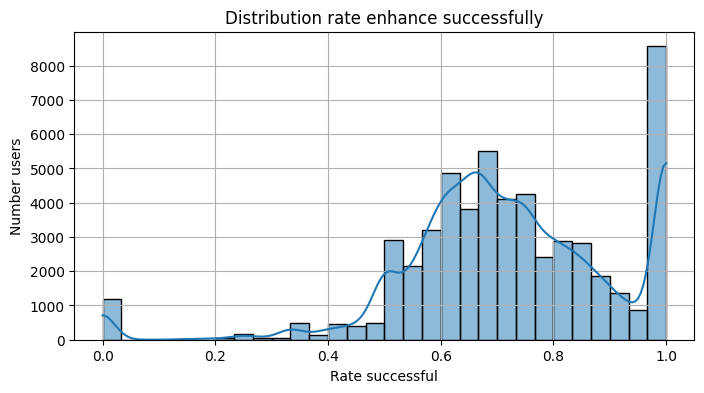

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df_equip['enhance_success_rate'].dropna(), bins=30, kde=True)
plt.title('Distribution rate enhance successfully')
plt.xlabel('Rate successful')
plt.ylabel('Number users')
plt.grid(True)
plt.show()

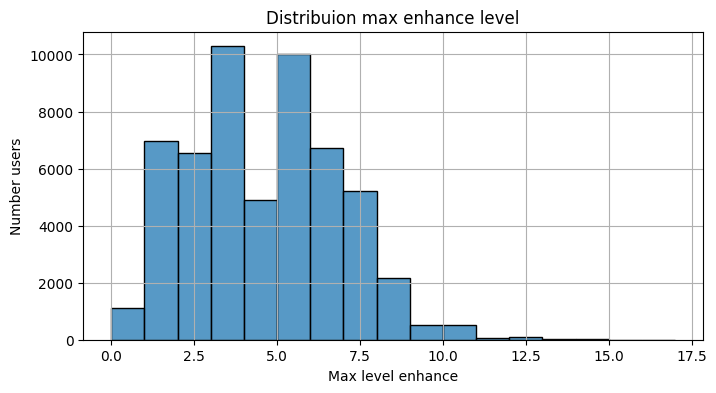

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df_equip['max_enhance_level'].dropna(), bins=range(0, df_equip['max_enhance_level'].max()+2), kde=False)
plt.title('Distribuion max enhance level')
plt.xlabel('Max level enhance')
plt.ylabel('Number users')
plt.grid(True)
plt.show()


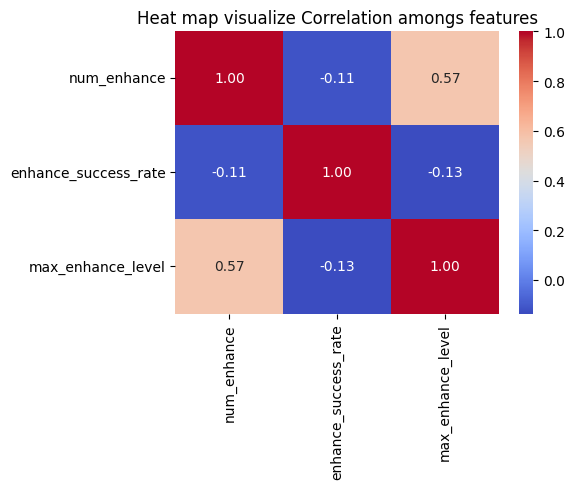

In [9]:
corr_cols = df_equip.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(6,5))
sns.heatmap(df_equip[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [10]:
X = df_equip.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Kmeans**

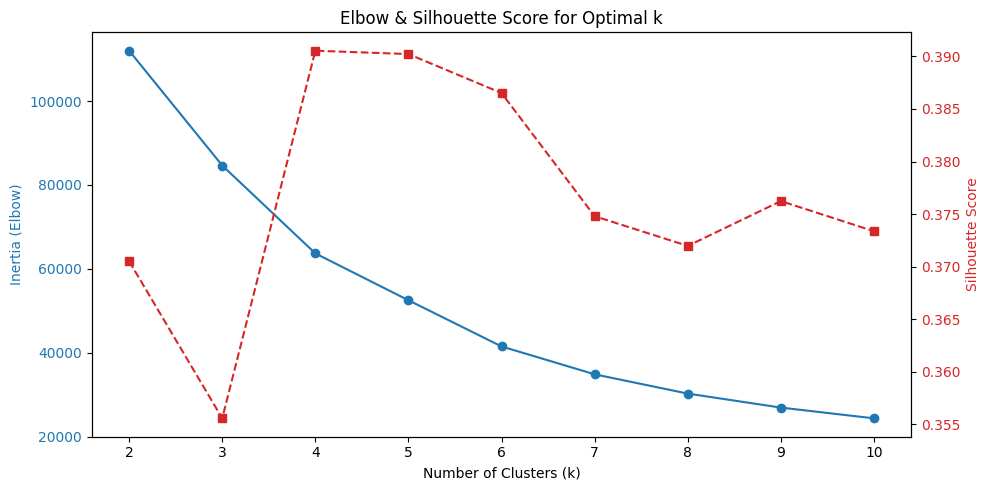

In [11]:
inertia = []
silhouette = []
K_range = range(2, 11)  # Number clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))


fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(K_range, inertia, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow & Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [13]:
df_equip['kmeans_cluster'] = kmeans_labels 

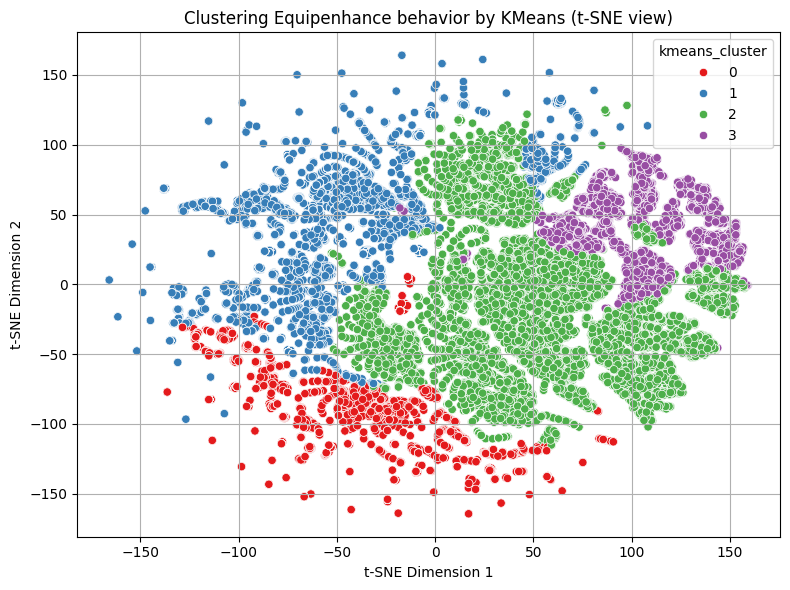

In [14]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(X_scaled)

df_equip['tsne_1'] = tsne_result[:, 0]
df_equip['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='tsne_1', y='tsne_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering Equipenhance behavior by KMeans (t-SNE view)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.show()

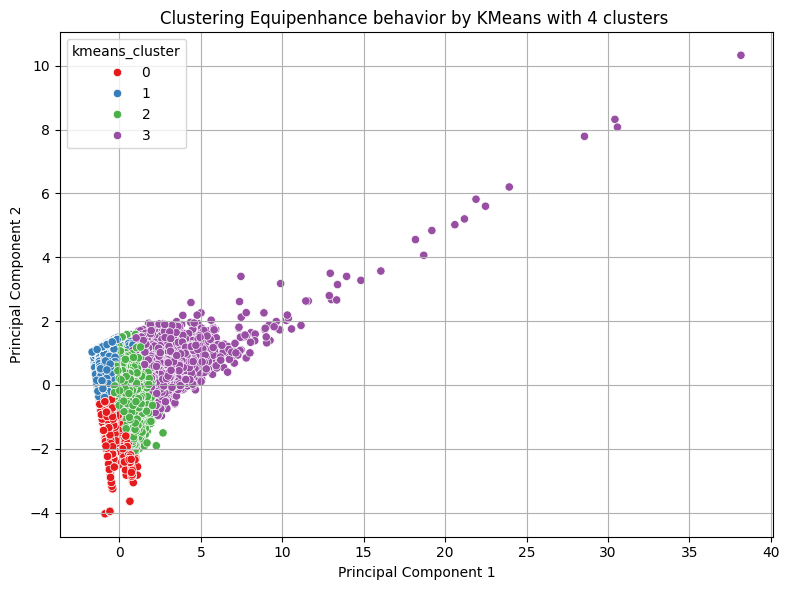

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_equip['pca_kmean_1'] = pca_result[:, 0]
df_equip['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering Equipenhance behavior by KMeans with 4 clusters ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
cluster_stats = df_equip.groupby('kmeans_cluster')[
    [
      'num_enhance','enhance_success_rate','max_enhance_level'
    ]   
].mean().round(2)

cluster_counts = df_equip['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='enhance_success_rate', ascending=False)
cluster_summary

,num_enhance,enhance_success_rate,max_enhance_level,num_users,percent_users
kmeans_cluster,,,,,
1,31.05,0.90,2.59,19679,35.69
2,124.01,0.67,5.64,21148,38.35
3,676.55,0.66,7.63,5077,9.21
0,16.50,0.48,1.91,9234,16.75


#### **Gaussian Mixture**

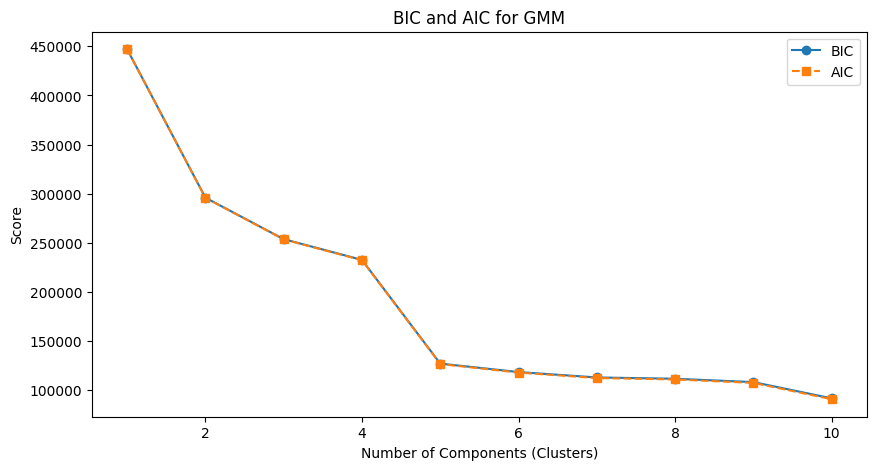

In [17]:
bic = []
aic = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.plot(n_components_range, aic, label='AIC', marker='s', linestyle='--')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Score')
plt.title('BIC and AIC for GMM')
plt.legend()
plt.show()

In [18]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

In [19]:
df_equip['gmm_cluster'] = gmm_labels 

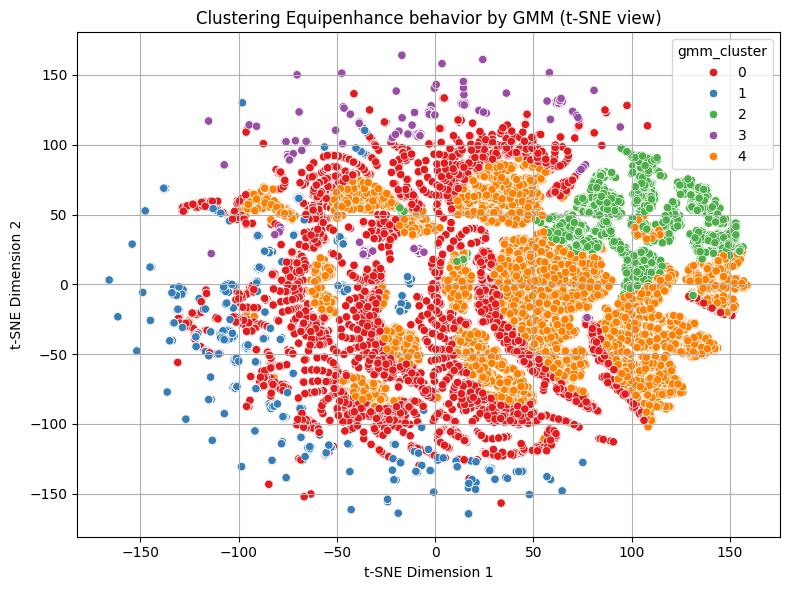

In [20]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result_gmm = tsne.fit_transform(X_scaled)

df_equip['tsne_gmm_1'] = tsne_result_gmm[:, 0]
df_equip['tsne_gmm_2'] = tsne_result_gmm[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='tsne_gmm_1', y='tsne_gmm_2',
    hue='gmm_cluster', palette='Set1'
)
plt.title(f'Clustering Equipenhance behavior by GMM (t-SNE view)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.show()

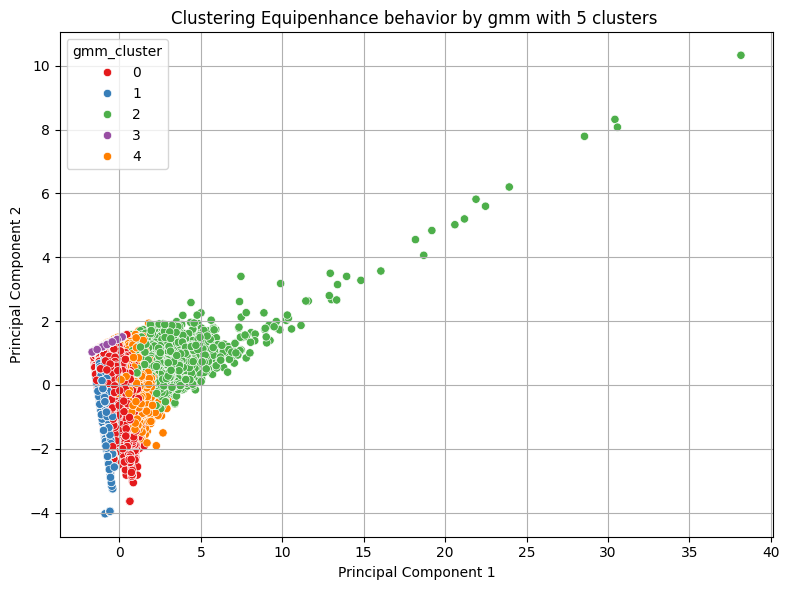

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_equip['pca_gmm_1'] = pca_result[:, 0]
df_equip['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='pca_gmm_1', y='pca_gmm_2',
    hue='gmm_cluster', palette='Set1'
)
plt.title(f'Clustering Equipenhance behavior by gmm with {5} clusters ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
cluster_stats = df_equip.groupby('gmm_cluster')[
    [
      'num_enhance','enhance_success_rate','max_enhance_level'
    ]   
].mean().round(2)

cluster_counts = df_equip['gmm_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='enhance_success_rate', ascending=False)
cluster_summary

,num_enhance,enhance_success_rate,max_enhance_level,num_users,percent_users
gmm_cluster,,,,,
3,3.27,1.00,1.99,7917,14.36
0,30.94,0.71,4.13,18656,33.84
4,196.06,0.70,5.51,15320,27.78
2,702.61,0.65,7.71,4498,8.16
1,6.16,0.56,1.66,8747,15.86


#### **Metrics and evaluating**

In [23]:
ch_kmeans = calinski_harabasz_score(X_scaled, df_equip['kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_scaled, df_equip['gmm_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")

KMeans Calinski–Harabasz Index: 29362.2859
GMM Calinski–Harabasz Index: 16568.4508


In [24]:
ch_kmeans = davies_bouldin_score(X_scaled, df_equip['kmeans_cluster'])
ch_gmm = davies_bouldin_score(X_scaled, df_equip['gmm_cluster'])

print(f"KMeans Davies-Bouldin score: {ch_kmeans:.4f}")
print(f"GMM Davies-Bouldin score: {ch_gmm:.4f}")

KMeans Davies-Bouldin score: 0.8611
GMM Davies-Bouldin score: 1.4037


**Conclusion**
- Chọn KMeans vì kết quả tốt hơn.
- Các cụm phân bố đồng đều.

In [25]:
df_equip['equi_beha'] = df_equip['kmeans_cluster']
mapping = {
    0: 'low',
    1: 'normal',
    2: 'whale',
    3: 'grinder'
}
df_equip['equi_beha'] = df_equip['kmeans_cluster'].map(mapping)

In [29]:
df_equip.drop(columns=['pca_gmm_1','pca_gmm_2','pca_kmean_1','pca_kmean_2','kmeans_cluster','gmm_cluster'],axis=1,inplace=True)

In [27]:
df_equip.to_csv("../EDA_transform/data/equipenhance_transform_cluster.csv",index=False,header=True)
